In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df = pd.read_csv("Orders.txt")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [28]:
df['order_approved_at'] = df['order_approved_at'].fillna(df['order_approved_at'].mode()[0])

In [24]:
df['order_delivered_carrier_date'] = df['order_delivered_carrier_date'].fillna(df['order_delivered_carrier_date'].mode()[0])

In [26]:
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].fillna(df['order_delivered_customer_date'].mode()[0])

In [21]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [52]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [54]:
df['delivery_days'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days


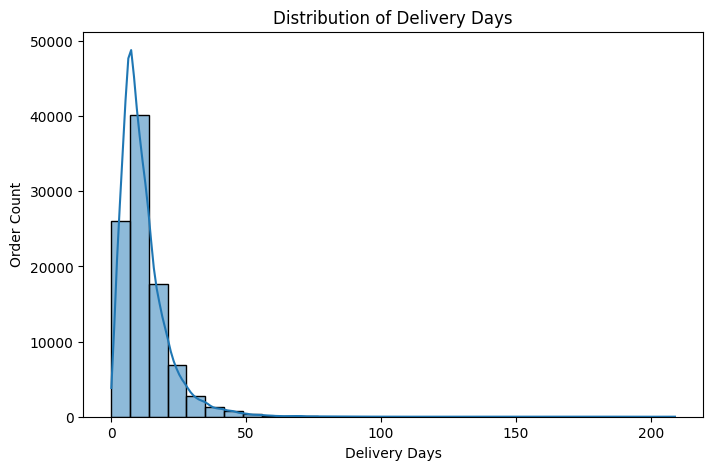

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_days'], bins=30, kde=True)
plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Order Count")
plt.show()

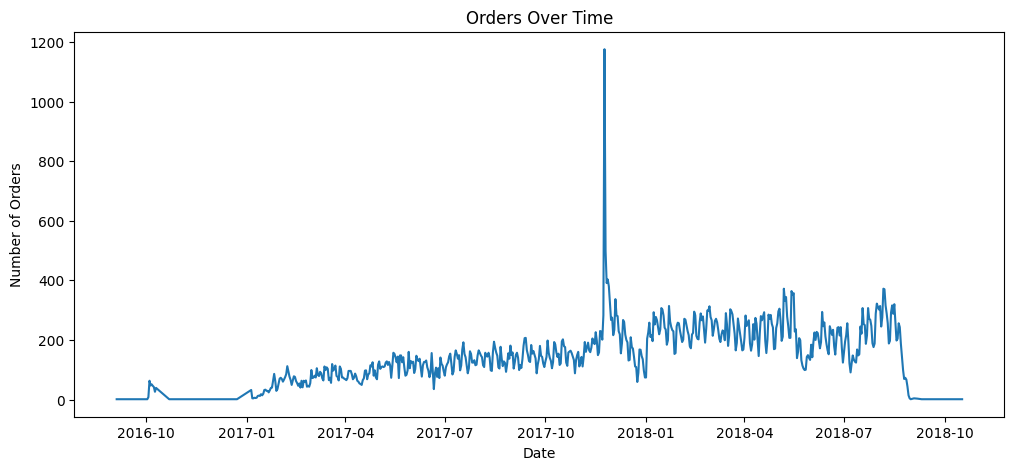

In [56]:
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.date

orders_per_day = df.groupby('order_purchase_date').size()

plt.figure(figsize=(12,5))
orders_per_day.plot()
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()


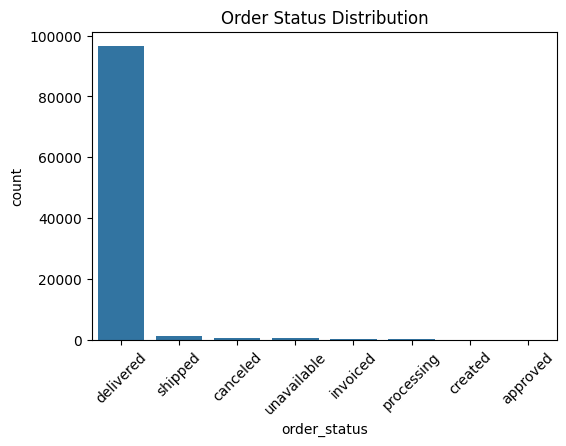

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='order_status', order=df['order_status'].value_counts().index)
plt.title("Order Status Distribution")
plt.xticks(rotation=45)
plt.show()


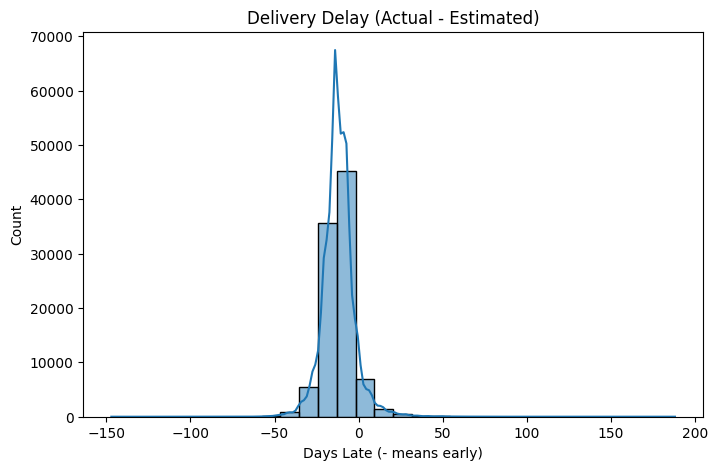

In [58]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')
df['delivery_delay'] = (
    df['order_delivered_customer_date'] - df['order_estimated_delivery_date']
).dt.days

plt.figure(figsize=(8,5))
sns.histplot(df['delivery_delay'].dropna(), bins=30, kde=True)
plt.title("Delivery Delay (Actual - Estimated)")
plt.xlabel("Days Late (- means early)")
plt.show()


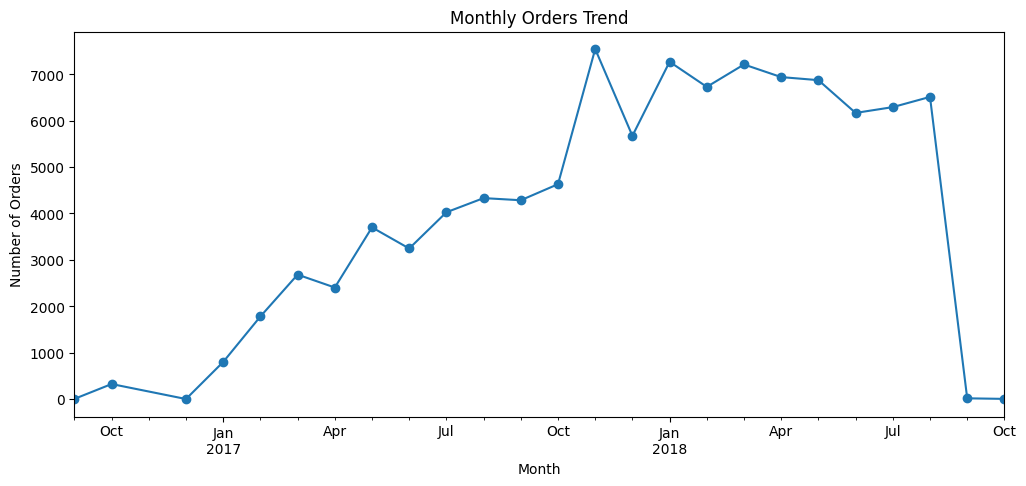

In [59]:
df['purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = df.groupby('purchase_month').size()

plt.figure(figsize=(12,5))
monthly_orders.plot(marker='o')
plt.title("Monthly Orders Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


In [60]:
df.to_csv("cleaned_Orders.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_Orders.csv'